In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import os
import numpy

In [2]:
# Define the paths to your data
base_dir = 'C:\\Users\\hp\\TensorFlowlite\\Main_dataset'
train_dir = os.path.join(base_dir, 'train')

In [3]:
# Define data generators for training and testing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,       # Normalize pixel values to [0, 1]
    validation_split=0.2     # Split data into 80% training and 20% validation
)

In [4]:
# Load and preprocess training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust target size as needed
    batch_size=32,           # Adjust batch size as needed
    class_mode='categorical',
    subset='training'
)

Found 127 images belonging to 2 classes.


In [5]:
# Load and preprocess testing data
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust target size as needed
    batch_size=32,           # Adjust batch size as needed
    class_mode='categorical',
    subset='validation'
)

Found 31 images belonging to 2 classes.


In [6]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Two classes: 'mud' and 'potholes'
])

In [7]:
# Compile the model with appropriate loss and optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# Train the model on the training dataset
history = model.fit(train_generator, epochs=100, validation_data=validation_generator)

Epoch 1/100
4/4 [==============================] - 49s 11s/step - loss: 2.9424 - accuracy: 0.4882 - val_loss: 0.6508 - val_accuracy: 0.6129
Epoch 2/100
4/4 [==============================] - 22s 5s/step - loss: 0.6725 - accuracy: 0.5354 - val_loss: 0.6199 - val_accuracy: 0.6774
Epoch 3/100
4/4 [==============================] - 21s 5s/step - loss: 0.5555 - accuracy: 0.7087 - val_loss: 0.5426 - val_accuracy: 0.7419
Epoch 4/100
4/4 [==============================] - 23s 5s/step - loss: 0.4073 - accuracy: 0.8346 - val_loss: 0.4931 - val_accuracy: 0.8065
Epoch 5/100
4/4 [==============================] - 22s 5s/step - loss: 0.2969 - accuracy: 0.8740 - val_loss: 0.6089 - val_accuracy: 0.8387
Epoch 6/100
4/4 [==============================] - 21s 5s/step - loss: 0.2834 - accuracy: 0.8976 - val_loss: 0.5703 - val_accuracy: 0.8387
Epoch 7/100
4/4 [==============================] - 21s 5s/step - loss: 0.2841 - accuracy: 0.8819 - val_loss: 0.5858 - val_accuracy: 0.8387
Epoch 8/100
4/4 [=========

4/4 [==============================] - 21s 5s/step - loss: 4.9507e-04 - accuracy: 1.0000 - val_loss: 1.1378 - val_accuracy: 0.8387
Epoch 60/100
4/4 [==============================] - 22s 5s/step - loss: 4.1203e-04 - accuracy: 1.0000 - val_loss: 1.1165 - val_accuracy: 0.8387
Epoch 61/100
4/4 [==============================] - 22s 5s/step - loss: 3.5001e-04 - accuracy: 1.0000 - val_loss: 1.0779 - val_accuracy: 0.8387
Epoch 62/100
4/4 [==============================] - 20s 5s/step - loss: 3.9793e-04 - accuracy: 1.0000 - val_loss: 1.0410 - val_accuracy: 0.8387
Epoch 63/100
4/4 [==============================] - 21s 5s/step - loss: 2.6933e-04 - accuracy: 1.0000 - val_loss: 1.0158 - val_accuracy: 0.8387
Epoch 64/100
4/4 [==============================] - 21s 5s/step - loss: 1.2222e-04 - accuracy: 1.0000 - val_loss: 1.0107 - val_accuracy: 0.8710
Epoch 65/100
4/4 [==============================] - 21s 5s/step - loss: 2.8735e-04 - accuracy: 1.0000 - val_loss: 1.0423 - val_accuracy: 0.8387
Epoch

In [9]:
# Evaluate the model on the testing dataset
test_dir = os.path.join(base_dir, 'test')

In [10]:
# Evaluate the model on the testing dataset
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [11]:
# Evaluate the model on the testing dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 40 images belonging to 2 classes.


In [12]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2%}')

2/2 [==============================] - 3s 423ms/step - loss: 0.7229 - accuracy: 0.8500
Test accuracy: 85.00%


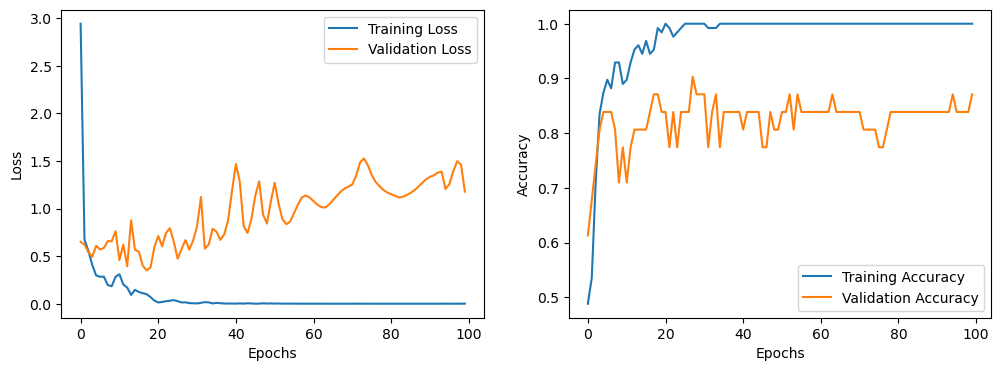

In [13]:
# Visualize training and validation loss and accuracy over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()